In [73]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree



In [38]:
df_dechets = pd.read_csv('/Users/manu/Desktop/SUP/ML, supervisée non-supervisée/Gestion_dechets/models/df_prepared.csv')

In [39]:
df_dechets.head()

,product,metal,width,optical_code,height_40,height_70,height_110,height_200,timestamp_first,timestamp_last,...,optical_code_numerical_only_Encoded,colorimetrie,transparency,teinte,colorimetrie_Encoded,transparency_Encoded,teinte_Encoded,longeur_mm,height,height_encoded
0,bouteille_b,False,50,W007007,True,True,True,False,2024-11-14 14:43:12.806718,2024-11-14 14:43:12.830720,...,50.0,W,7,7,0,7.0,7.0,53.34,"[110, 200]",4
1,dechet,False,88,T055084,True,True,False,False,2024-11-14 14:54:05.926735,2024-11-14 14:54:05.956213,...,1974.0,T,55,84,1,55.0,84.0,65.51,"[70, 110]",3
2,bouteille_t,False,67,T061084,True,True,True,True,2024-11-14 14:48:32.643863,2024-11-14 14:48:32.672328,...,2277.0,T,61,84,1,61.0,84.0,63.26,>= 200,5
3,yaourt,False,50,W048011,True,False,False,False,2024-11-14 14:47:55.702283,2024-11-14 14:47:55.727719,...,1581.0,W,48,11,0,48.0,11.0,56.52,"[40, 70]",2
4,carton_grand,False,5,B086012,True,True,True,False,2024-11-14 14:53:25.071431,2024-11-14 14:53:25.210207,...,3013.0,B,86,12,2,86.0,12.0,308.39,"[110, 200]",4


# TEST 1

In [40]:
X = df_dechets[['metal', 'width','optical_code_Encoded','longeur_mm','height_encoded']]
y  = df_dechets['product']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

###  RandomForest

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
accuracy

0.8914167528438469

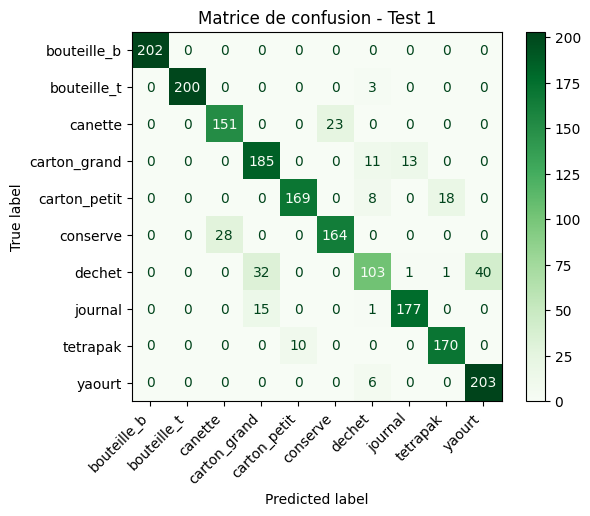

In [42]:
# Calcul des prédictions
y_pred = rf.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Définir les noms des classes (extraites des données ou du modèle)
class_names = rf.classes_ 

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Greens', values_format='d')
plt.xticks(rotation=45, ha='right')  # Inclinaison à 45° et alignement à droite
plt.title('Matrice de confusion - Test 1')
plt.show()

### DecisionTree

In [43]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
accuracy

0.8402275077559462

## TEST 2

In [44]:
X = df_dechets[['metal', 'width','optical_code_numerical_only_Encoded','longeur_mm','height_encoded']]
y  = df_dechets['product']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

## RandomForest

In [45]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
accuracy

0.8247156153050672

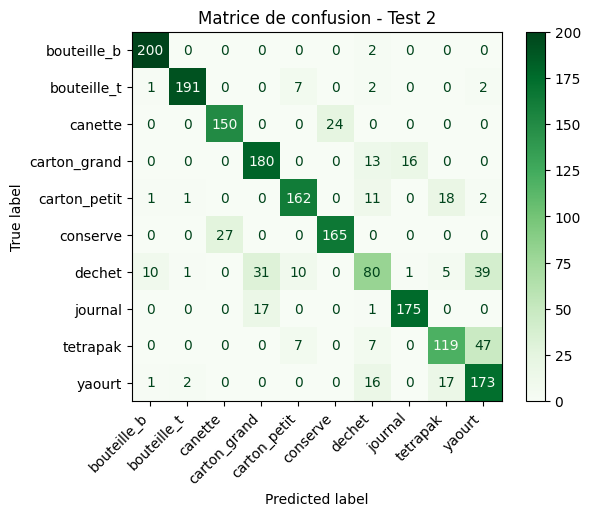

In [46]:
# Calcul des prédictions
y_pred = rf.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Définir les noms des classes (extraites des données ou du modèle)
class_names = rf.classes_ 

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Greens', values_format='d')
plt.xticks(rotation=45, ha='right')  # Inclinaison à 45° et alignement à droite
plt.title('Matrice de confusion - Test 2')
plt.show()

## DecisionTree

In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
accuracy

0.7605997931747673

# TEST 3

In [48]:
X = df_dechets[['metal', 'width','colorimetrie_Encoded', 'transparency_Encoded','teinte_Encoded','longeur_mm','height_encoded']]
y  = df_dechets['product']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

## RandomForest

In [49]:
%%time
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
accuracy

CPU times: user 568 ms, sys: 16 ms, total: 584 ms
Wall time: 584 ms


0.9110651499482937

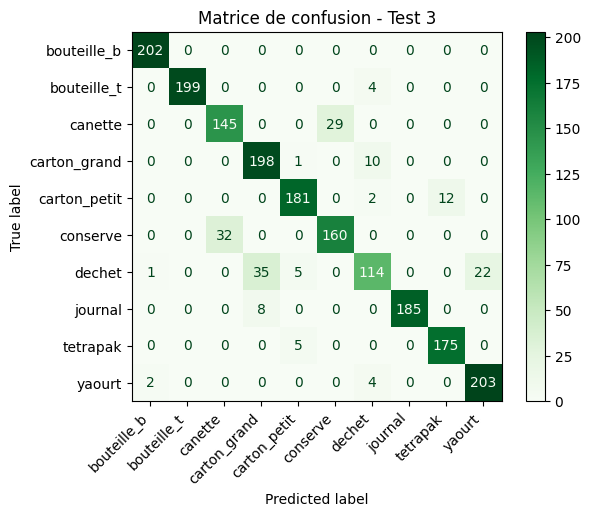

In [50]:
# Calcul des prédictions
y_pred = rf.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Définir les noms des classes (extraites des données ou du modèle)
class_names = rf.classes_ 

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Greens', values_format='d')
plt.xticks(rotation=45, ha='right')  # Inclinaison à 45° et alignement à droite
plt.title('Matrice de confusion - Test 3')
plt.show()

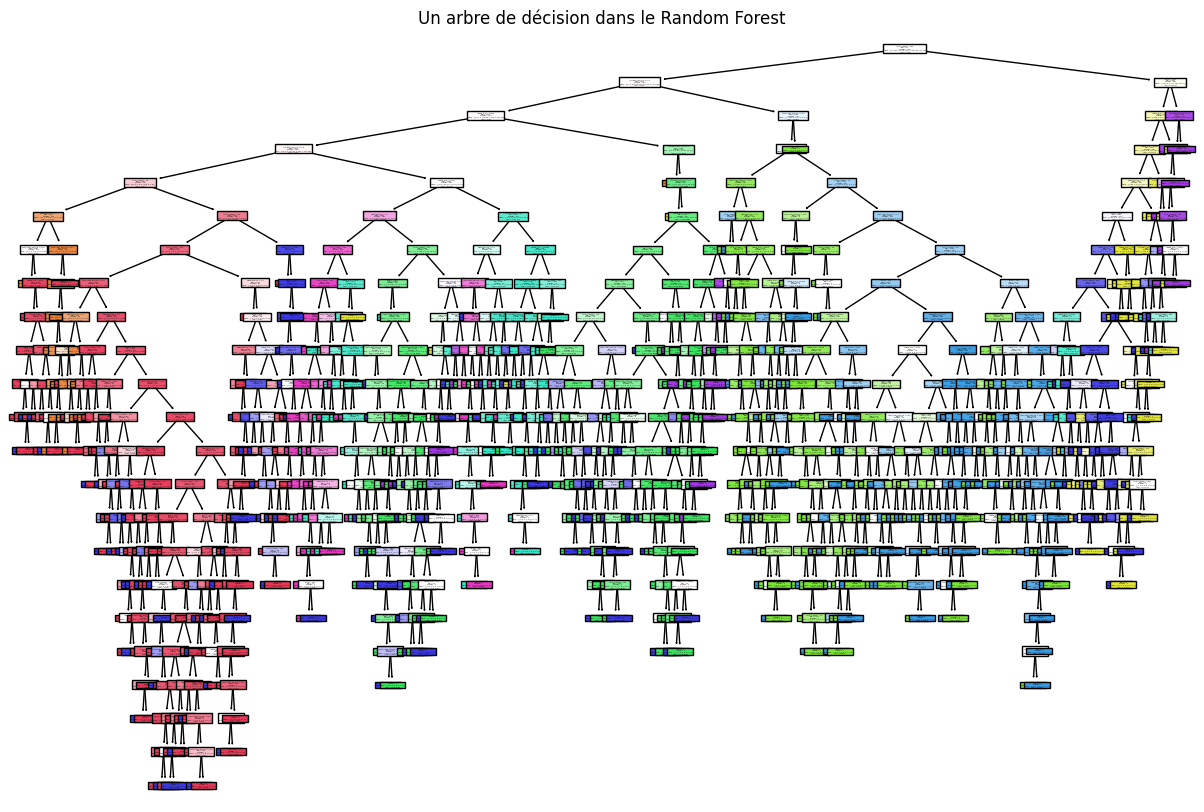

In [84]:
feature_names_list =X_train.columns.to_list()
class_names_ = rf.classes_.tolist()
plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=feature_names_list, class_names=class_names_)
plt.title("Un arbre de décision dans le Random Forest")
plt.show()

## DecisionTree

In [51]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
accuracy

0.8707342295760083

### RandomForest avec PCA

#### Compo 1

In [52]:
%%time
model_PCA = PCA(n_components=1).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.55 s, sys: 304 ms, total: 1.85 s
Wall time: 1.11 s


0.23991726990692863

In [53]:
%%time
model_PCA = PCA(n_components=1).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

CPU times: user 33.3 ms, sys: 18 ms, total: 51.2 ms
Wall time: 11.7 ms


In [54]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.45 s, sys: 279 ms, total: 1.73 s
Wall time: 1.08 s


0.23991726990692863

#### Compo 2

In [55]:
%%time
model_PCA = PCA(n_components=2).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.35 s, sys: 339 ms, total: 1.69 s
Wall time: 1.09 s


0.4105480868665977

In [56]:
%%time
model_PCA = PCA(n_components=2).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

CPU times: user 31.8 ms, sys: 15.5 ms, total: 47.2 ms
Wall time: 10.6 ms


In [57]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.44 s, sys: 275 ms, total: 1.71 s
Wall time: 1.07 s


0.4105480868665977

#### Compo 3

In [58]:
%%time
model_PCA = PCA(n_components=3).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.26 s, sys: 240 ms, total: 1.5 s
Wall time: 1.08 s


0.733195449844881

In [59]:
%%time
model_PCA = PCA(n_components=3).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

CPU times: user 32.8 ms, sys: 13.2 ms, total: 46 ms
Wall time: 10.4 ms


In [60]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.29 s, sys: 279 ms, total: 1.57 s
Wall time: 981 ms


0.733195449844881

#### Compo 4

In [61]:
%%time
model_PCA = PCA(n_components=4).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.87 s, sys: 252 ms, total: 2.12 s
Wall time: 1.57 s


0.795760082730093

In [62]:
%%time
model_PCA = PCA(n_components=4).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

CPU times: user 38.2 ms, sys: 24.8 ms, total: 63 ms
Wall time: 14.6 ms


In [63]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.9 s, sys: 265 ms, total: 2.16 s
Wall time: 1.56 s


0.795760082730093

#### Compo 5

In [64]:
%%time
model_PCA = PCA(n_components=5).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.81 s, sys: 290 ms, total: 2.1 s
Wall time: 1.38 s


0.8877973112719751

In [65]:
%%time
model_PCA = PCA(n_components=5).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

CPU times: user 35.7 ms, sys: 20.6 ms, total: 56.3 ms
Wall time: 12.6 ms


In [66]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.59 s, sys: 247 ms, total: 1.84 s
Wall time: 1.2 s


0.8877973112719751

#### Compo 6

In [67]:
%%time
model_PCA = PCA(n_components=6).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.97 s, sys: 249 ms, total: 2.21 s
Wall time: 1.85 s


0.9069286452947259

In [68]:
%%time
model_PCA = PCA(n_components=6).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)


CPU times: user 18.5 ms, sys: 12.5 ms, total: 31 ms
Wall time: 8.81 ms


In [69]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.98 s, sys: 253 ms, total: 2.23 s
Wall time: 1.88 s


0.9069286452947259

#### Compo 7

In [70]:
%%time
model_PCA = PCA(n_components=7).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.61 s, sys: 456 ms, total: 2.06 s
Wall time: 1.58 s


0.9105480868665977

In [71]:
%%time
model_PCA = PCA(n_components=7).fit(X_train)
X_train_PCA = model_PCA.transform(X_train)
X_test_PCA = model_PCA.transform(X_test)

CPU times: user 16.4 ms, sys: 15.8 ms, total: 32.2 ms
Wall time: 9.8 ms


In [72]:
%%time
model_RF = RandomForestClassifier(random_state=42).fit(X_train_PCA,y_train)
model_RF.score(X_test_PCA, y_test)

CPU times: user 1.7 s, sys: 473 ms, total: 2.18 s
Wall time: 1.17 s


0.9105480868665977